<a href="https://colab.research.google.com/github/shivamoop/diabetes_prediction-AIF-project-/blob/main/Project_diabetes_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes_ Analysis


Description:- The Diabetes Data Analysis Project aims to explore and analyze a dataset related to diabetes. The dataset contains information about various factors and attributes associated with diabetes, such as gender, age, hypertension, heart disease, smoking history, BMI (Body Mass Index), HbA1c level, blood glucose level, and diabetes diagnosis. The project focuses on performing descriptive analysis and generating insights to gain a better understanding of the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
dataset=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
dataset

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [ ]:
def group_ages(dataset: pd.DataFrame) -> pd.DataFrame:
    # Define the age ranges
    age_ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80)]

    # Create a new column 'age_group'
    dataset['age_range'] = pd.cut(dataset['age'], bins=[r[0]-1 for r in age_ranges]+[age_ranges[-1][1]], labels=[f"{r[0]}-{r[1]}" for r in age_ranges])

    return dataset
dataset= group_ages(dataset)


In [ ]:
dataset.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes age_range  
0          6.6                  140         0     71-80  
1          6.6                   80         0     51-60  
2          5.7                  158         0     21-30  
3          5.0                  155         0     31-40  
4          4.8                  155         0     71-80

In [ ]:
dataset.tail()

gender   age  hypertension  heart_disease smoking_history    bmi  \
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes age_range  
99995          6.2                   90         0     71-80  
99996          6.5                  100         0      1-10  
99997          5.7                  155         0     61-70  
99998          4.0                  100         0     21-30  
99999          6.6                   90         0     51-60

In [ ]:
dataset[3500:3505]

gender   age  hypertension  heart_disease smoking_history    bmi  \
3500  Female  62.0             0              0         No Info  33.75   
3501  Female  28.0             0              0           never  27.32   
3502    Male  18.0             0              0           never  26.09   
3503    Male  54.0             0              0          former  27.32   
3504  Female   3.0             0              0         No Info  14.35   

      HbA1c_level  blood_glucose_level  diabetes age_range  
3500          5.0                  100         0     61-70  
3501          4.0                  160         0     21-30  
3502          5.7                  145         0     11-20  
3503          5.7                  126         0     51-60  
3504          4.8                   85         0      1-10

In [ ]:
dataset.shape

(100000, 10)

In [ ]:
dataset.describe(include= 'all')

gender            age  hypertension  heart_disease smoking_history  \
count   100000  100000.000000  100000.00000  100000.000000          100000   
unique       3            NaN           NaN            NaN               6   
top     Female            NaN           NaN            NaN         No Info   
freq     58552            NaN           NaN            NaN           35816   
mean       NaN      41.885856       0.07485       0.039420             NaN   
std        NaN      22.516840       0.26315       0.194593             NaN   
min        NaN       0.080000       0.00000       0.000000             NaN   
25%        NaN      24.000000       0.00000       0.000000             NaN   
50%        NaN      43.000000       0.00000       0.000000             NaN   
75%        NaN      60.000000       0.00000       0.000000             NaN   
max        NaN      80.000000       1.00000       1.000000             NaN   

                  bmi    HbA1c_level  blood_glucose_level       diabetes  \
count   100000.000000  100000.000000        100000.000000  100000.000000   
unique            NaN            NaN                  NaN            NaN   
top               NaN            NaN                  NaN            NaN   
freq              NaN            NaN                  NaN            NaN   
mean        27.320767       5.527507           138.058060       0.085000   
std          6.636783       1.070672            40.708136       0.278883   
min         10.010000       3.500000            80.000000       0.000000   
25%         23.630000       4.800000           100.000000       0.000000   
50%         27.320000       5.800000           140.000000       0.000000   
75%         29.580000       6.200000           159.000000       0.000000   
max         95.690000       9.000000           300.000000       1.000000   

       age_range  
count     100000  
unique         8  
top        51-60  
freq       14831  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   gender               100000 non-null  object  
 1   age                  100000 non-null  float64 
 2   hypertension         100000 non-null  int64   
 3   heart_disease        100000 non-null  int64   
 4   smoking_history      100000 non-null  object  
 5   bmi                  100000 non-null  float64 
 6   HbA1c_level          100000 non-null  float64 
 7   blood_glucose_level  100000 non-null  int64   
 8   diabetes             100000 non-null  int64   
 9   age_range            100000 non-null  category
dtypes: category(1), float64(3), int64(4), object(2)
memory usage: 7.0+ MB


In [ ]:
dataset.isnull()

gender    age  hypertension  heart_disease  smoking_history    bmi  \
0       False  False         False          False            False  False   
1       False  False         False          False            False  False   
2       False  False         False          False            False  False   
3       False  False         False          False            False  False   
4       False  False         False          False            False  False   
...       ...    ...           ...            ...              ...    ...   
99995   False  False         False          False            False  False   
99996   False  False         False          False            False  False   
99997   False  False         False          False            False  False   
99998   False  False         False          False            False  False   
99999   False  False         False          False            False  False   

       HbA1c_level  blood_glucose_level  diabetes  age_range  
0            False                False     False      False  
1            False                False     False      False  
2            False                False     False      False  
3            False                False     False      False  
4            False                False     False      False  
...            ...                  ...       ...        ...  
99995        False                False     False      False  
99996        False                False     False      False  
99997        False                False     False      False  
99998        False                False     False      False  
99999        False                False     False      False  

[100000 rows x 10 columns]

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
age_range              0
dtype: int64

In [ ]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'age_range'],
      dtype='object')

In [ ]:
dataset[[ 'gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes'
]].value_counts()

gender  age   hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level  diabetes
Female  80.0  0             0              No Info          27.32  6.2          90                   0           9
                                                                   6.5          159                  0           9
                                                                   4.0          85                   0           8
                                                                   6.6          155                  0           7
                                                                   4.5          140                  0           7
                                                                                                                ..
        48.0  0             0              never            27.32  6.6          200                  0           1
                                                                   6.5          200  

In [ ]:
dataset['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [ ]:
dataset['blood_glucose_level'].value_counts()

130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: blood_glucose_level, dtype: int64

In [ ]:
dataset.corr()

<ipython-input-18-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.166733             1.000000  0.419558  
diabetes                0.400660             0.419558  1.000000

In [ ]:
dataset['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
dataset['hypertension'].unique()

array([0, 1])

In [ ]:
dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
dataset[dataset['gender']=='Other']

gender   age  hypertension  heart_disease smoking_history    bmi  \
12669  Other  10.0             0              0     not current  14.09   
14838  Other  19.0             0              0         No Info  27.32   
16702  Other  39.0             0              0     not current  31.24   
18691  Other  10.0             0              0     not current  16.59   
23266  Other  23.0             0              0         No Info  24.23   
31985  Other  53.0             0              0         No Info  27.32   
33805  Other  45.0             0              0           never  27.32   
34929  Other  47.0             0              0           never  36.76   
35006  Other  47.0             0              0           never  36.76   
40337  Other  18.0             0              0     not current  30.19   
56238  Other  10.0             0              0     not current  19.75   
66595  Other  55.0             0              0         No Info  27.32   
66887  Other  19.0             0              0         No Info  27.32   
67204  Other   7.0             0              0         No Info  27.32   
68484  Other  52.0             0              0     not current  31.63   
71139  Other  28.0             0              0            ever  27.32   
75302  Other  26.0             0              0     not current  37.49   
75734  Other  24.0             0              0     not current  22.86   

       HbA1c_level  blood_glucose_level  diabetes age_range  
12669          5.0                  140         0      1-10  
14838          5.7                  158         0     11-20  
16702          6.2                   85         0     31-40  
18691          6.1                  160         0      1-10  
23266          6.1                  140         0     21-30  
31985          6.6                  160         0     51-60  
33805          4.0                  159         0     41-50  
34929          6.6                   90         0     41-50  
35006          3.5                  200         0     41-50  
40337          6.1                   90         0     11-20  
56238          6.1                  126         0      1-10  
66595          5.0                  158         0     51-60  
66887          3.5                  160         0     11-20  
67204          3.5                  159         0      1-10  
68484          6.6                  159         0     51-60  
71139          4.5                  126         0     21-30  
75302          6.0                   80         0     21-30  
75734          6.2                  160         0     21-30

In [ ]:
dataset['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
dataset[dataset.duplicated()]

gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes age_range  
2756           6.6                  159         0     71-80  
3272           3.5                   80         0     71-80  
3418           6.5                  100         0     11-20  
3939           3.5                  130         0     71-80  
3960           6.0                  200         0     41-50  
...            ...                  ...       ...       ...  
99980          6.1                  145         0     51-60  
99985          5.8                  145         0     21-30  
99989          5.0                  158         0     21-30  
99990          6.1                  100         0     31-40  
99995          6.2                   90         0     71-80  

[3854 rows x 10 columns]

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes, age_range]
Index: []

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(96146, 10)

Task1: Plotting a pie graph to show diabetes distribution(diabetes vs NON diabetes people).

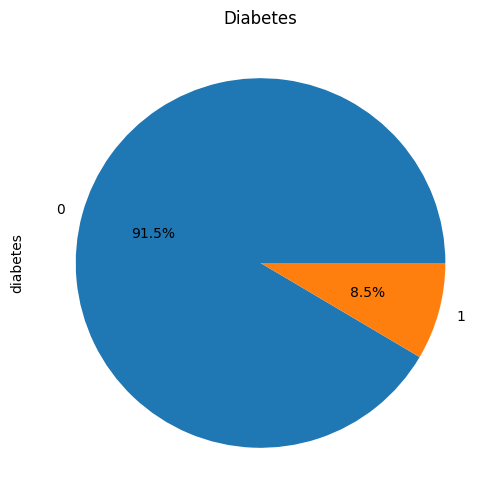

In [ ]:
plt.figure(figsize=(6, 6))
dataset['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Diabetes')
plt.show()

Conclusion:The above graph shows that 91.5% people are NON-diabetes where 8.5% are diabetes.

Task2: Analysing diabetes among Gender.

In [ ]:
Gdiab= dataset.groupby('gender')['diabetes'].sum()
Gdiab = pd.DataFrame(Gdiab)
Gdiab.reset_index(inplace=True)
print(Gdiab)

   gender  diabetes
0  Female      4461
1    Male      4039
2   Other         0


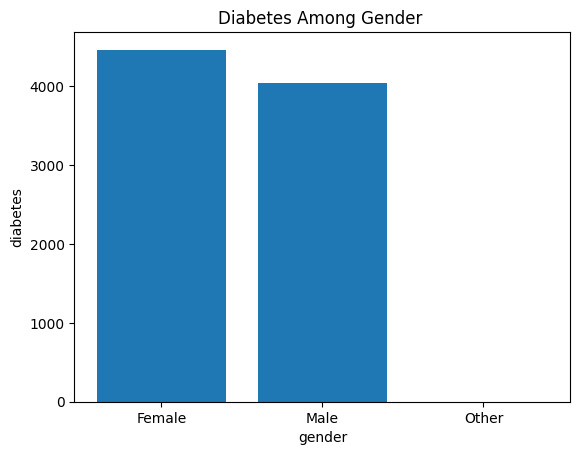

In [ ]:
#plotting a bar chart
plt.bar(x='gender',height='diabetes',data=Gdiab)
plt.xlabel('gender')
plt.ylabel('diabetes')
plt.title('Diabetes Among Gender ')
plt.show()

Conclusion: Females are more prone to diabetes.

Task3: Plotting a Histogram for each feature to depict distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

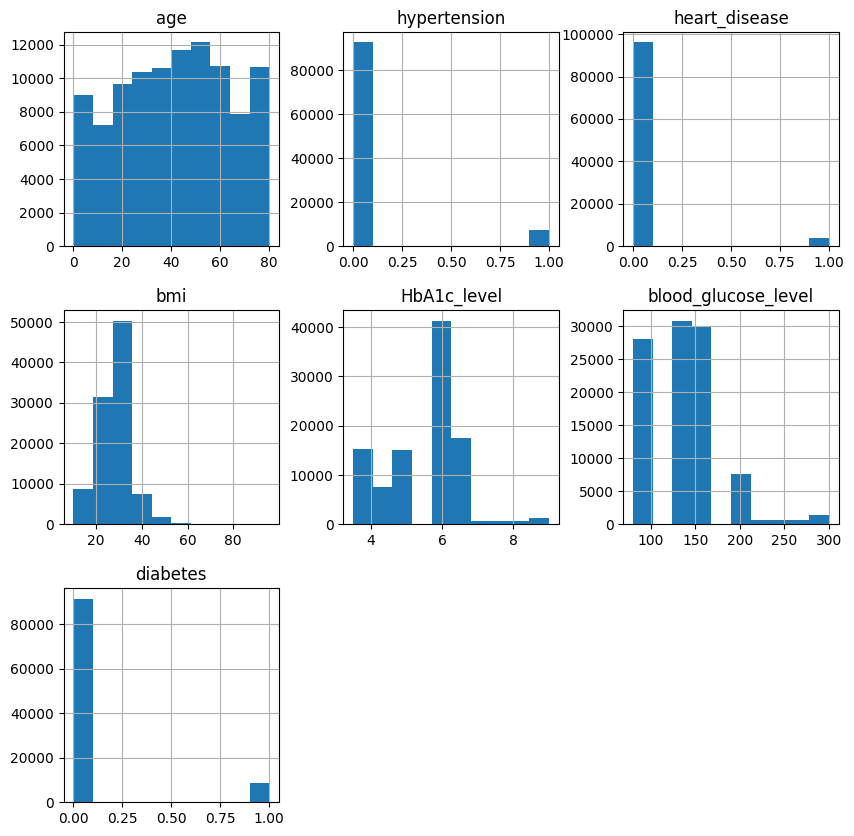

In [ ]:
dataset.hist(bins=10,figsize=(10, 10))

Task 4: Plotting a pairplot to show how diabetes varies with other factors.

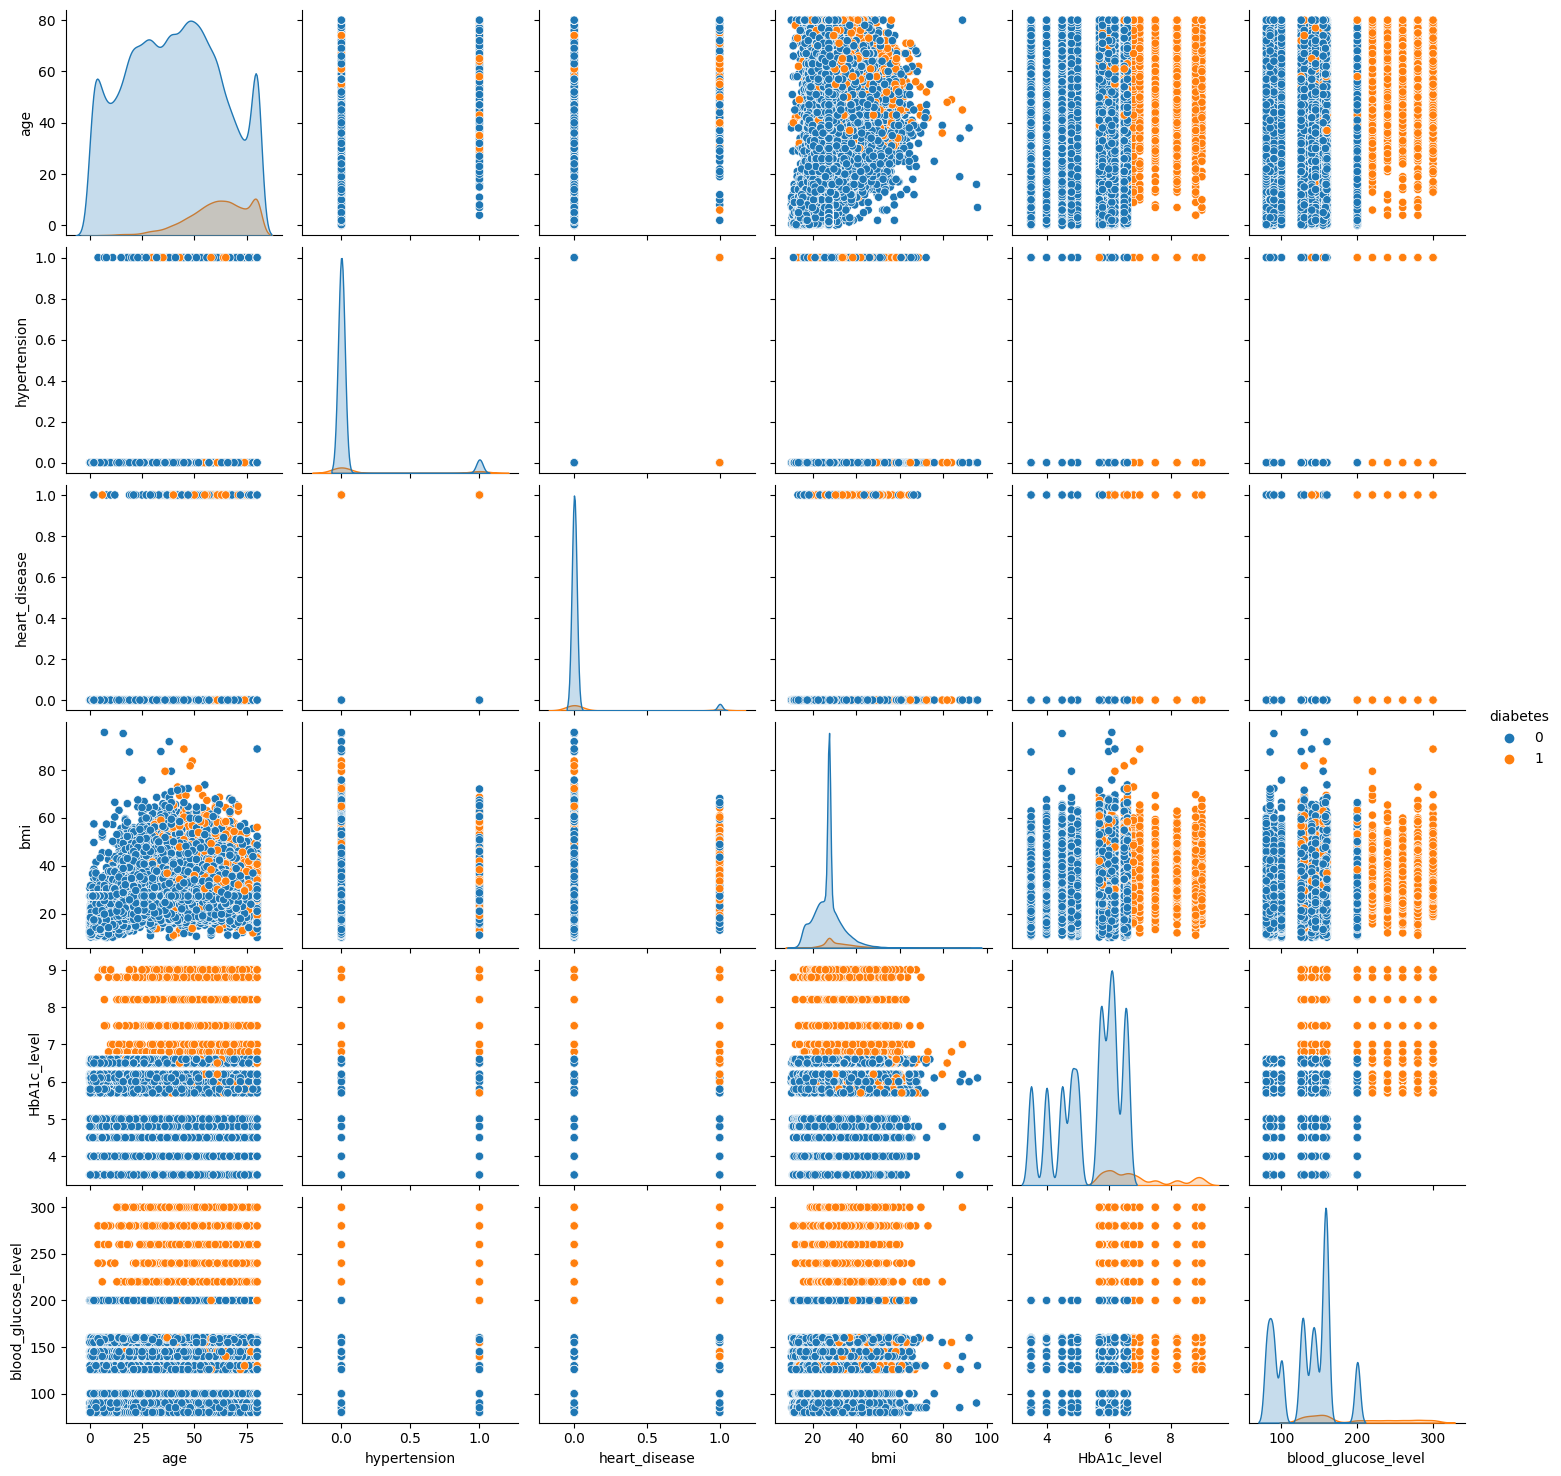

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.pairplot( data=dataset , hue="diabetes")
plt.figure(figsize=(10,10))
plt.show()

Task 5:Plotting a bar chart for Gender Distribution and it's count

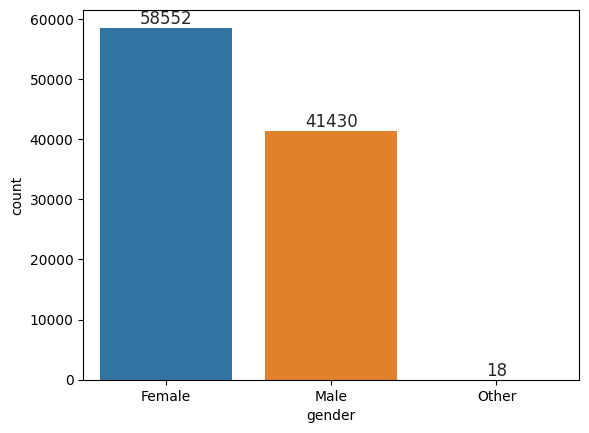

In [ ]:
ax = sns.countplot(x = 'gender',data = dataset)
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Task 6: Analysing no. of Hypertension patients for each gender.

In [ ]:
Ghyper= dataset.groupby('gender')['hypertension'].sum()
Ghyper = pd.DataFrame(Ghyper)
Ghyper.reset_index(inplace=True)
print(Ghyper)

   gender  hypertension
0  Female          4197
1    Male          3288
2   Other             0


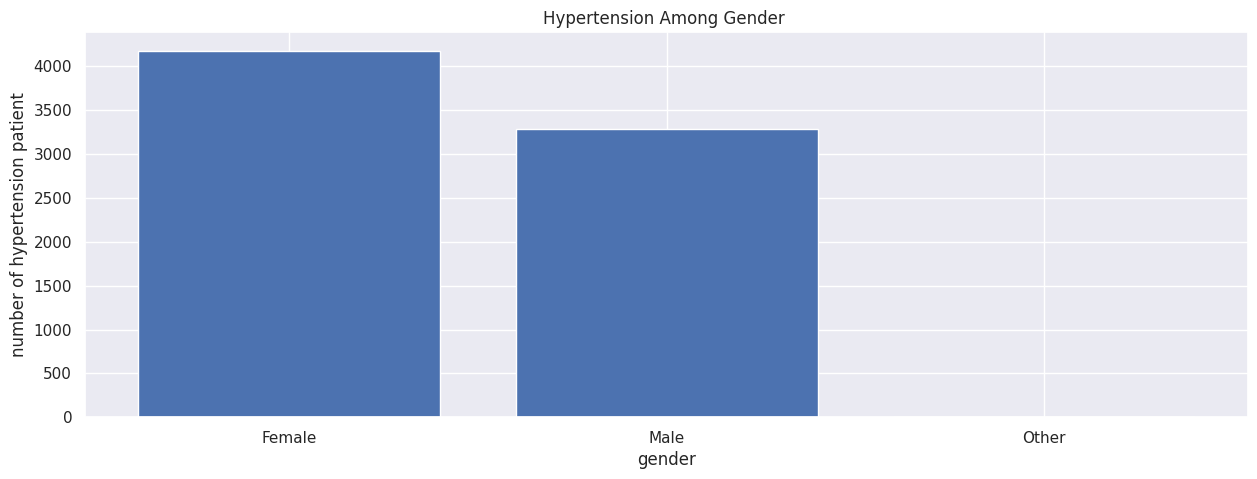

In [ ]:
#plotting a bar chart
plt.bar(x='gender',height='hypertension',data=Ghyper)
plt.xlabel('gender')
plt.ylabel('number of hypertension patient')
plt.title('Hypertension Among Gender ')
plt.show()

Conclusion:The above graph shows that females are more prone to Hypertension.

Task 7: Analysing number of smoking patient for each gender.

In [ ]:
Gsmoke= dataset.groupby('gender')['smoking_history'].size().reset_index(name='count')
Gsmoke = pd.DataFrame(Gsmoke)
print(Gsmoke)

   gender  count
0  Female  56161
1    Male  39967
2   Other     18


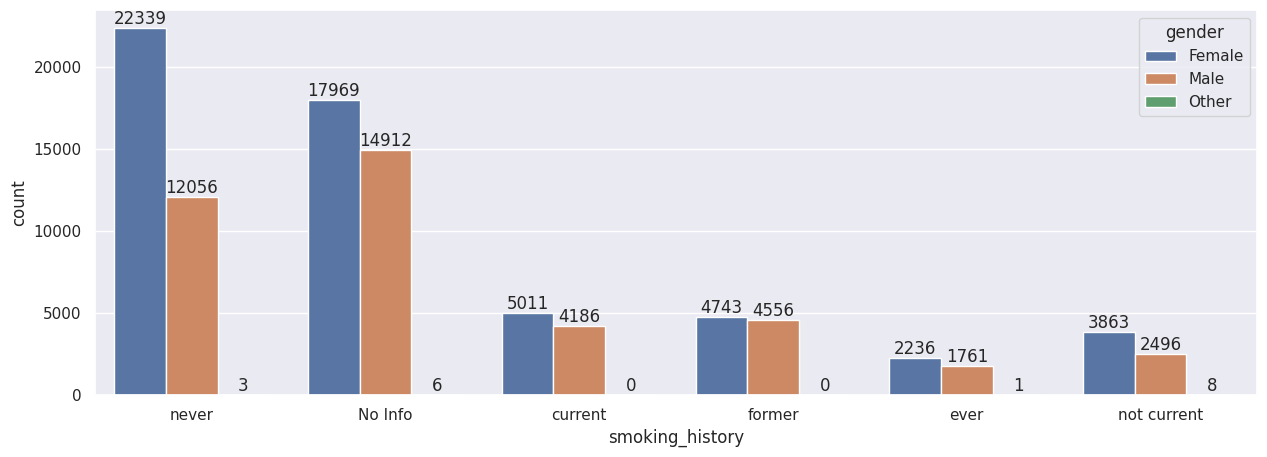

In [ ]:
ax = sns.countplot(data = dataset, x ='smoking_history', hue ='gender' )
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Task 8: Analysing number of heartdisease patient for each gender.

In [ ]:
Gheart= dataset.groupby('gender')['heart_disease'].sum()
Gheart = pd.DataFrame(Gheart)
Gheart.reset_index(inplace=True)
print(Gheart)

   gender  heart_disease
0  Female           1562
1    Male           2380
2   Other              0


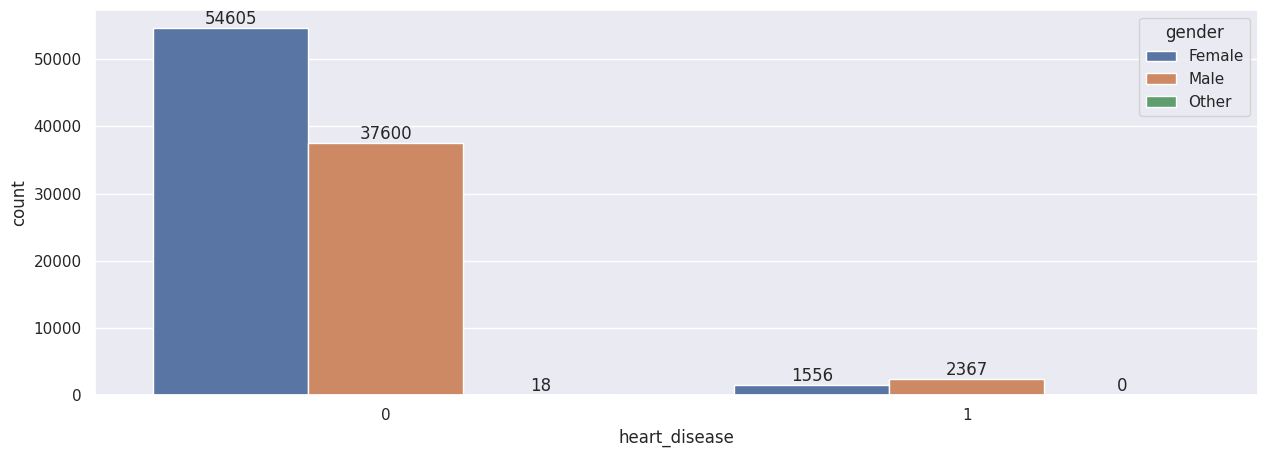

In [ ]:
ax = sns.countplot(data = dataset, x ='heart_disease', hue ='gender' )
sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

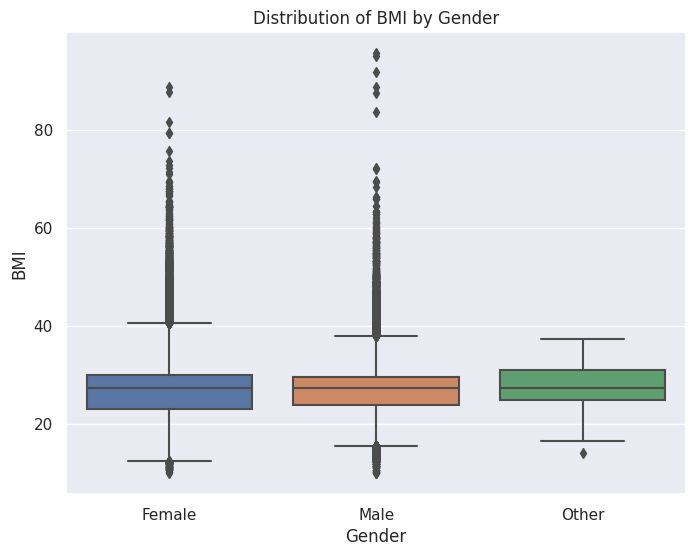

In [ ]:
# Box plot of BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='bmi', data=dataset)
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Gender')
plt.show()


<ipython-input-16-2e38ccb2cdba>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



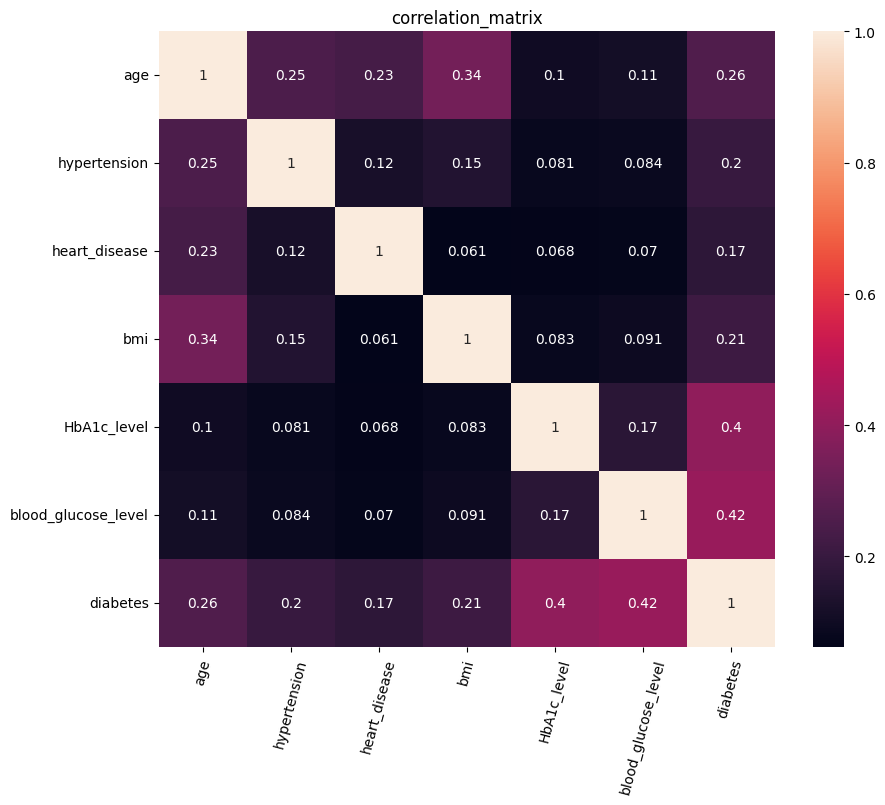

In [ ]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,square=True)
plt.xticks(rotation=75)
plt.yticks(rotation=0)
plt.title('correlation_matrix')
plt.show()

In [ ]:
# Scatter plot of blood glucose level and age
fig = px.scatter(dataset, x='age', y='blood_glucose_level', color='diabetes', title='Blood Glucose Level vs Age')
fig.show()


In [ ]:
fig = px.scatter(data_frame = dataset, x="blood_glucose_level",
                    y="diabetes", size="bmi",
                    trendline="ols",
                    title="Relationship between Blood glucose level and Diabetes")
fig.show()

In [ ]:
import plotly.express as px


age_groups = dataset['age_range']
smoking_history = dataset['smoking_history']


fig = px.histogram(dataset, x=age_groups, color=smoking_history, barmode='group',
                   category_orders={'age_group': ['Below 18', '18-22', '23-27', '28-32', '33-37', 'Above 37']},
                   color_discrete_sequence=px.colors.diverging.Picnic)

fig.update_layout(
    title='Smoking History by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Smoking History',
    barmode='group',
    template='plotly_dark'
)


fig.show()


In [ ]:
age=dataset['age']
age= pd.DataFrame(age).astype('int64')


In [ ]:
for index,row in age.iterrows():
  if age.at[index,'age']<18:
    age.at[index,'age_group']='Below 18'
  elif age.at[index,'age']>=18 and age.at[index,'age']<=24:
    age.at[index,'age_group']='18-24'
  elif age.at[index,'age']>=25 and age.at[index,'age']<=35:
    age.at[index,'age_group']='25-35'
  elif age.at[index,'age']>=36 and age.at[index,'age']<=45:
    age.at[index,'age_group']='36-45'
  elif age.at[index,'age']>=46 and age.at[index,'age']<=59:
    age.at[index,'age_group']='46-59'
  else:
    age.at[index,'age_group']='Above 60'

In [ ]:
age.head()

age age_group
0   80  Above 60
1   54     46-59
2   28     25-35
3   36     36-45
4   76  Above 60

In [ ]:
import plotly.graph_objects as go

combined_data = pd.concat([age['age_group'], dataset['smoking_history']], axis=1)

counts = combined_data.groupby(['age_group', 'smoking_history']).size().reset_index(name='count')

fig = go.Figure(data=go.Pie(labels=counts['smoking_history'], values=counts['count'], hole=0.4))

fig.update_layout(title='Smoking History by Age Group',
                  showlegend=True,
                  legend=dict(title='Age Group'),
                  annotations=[dict(text='Smoking History', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()


In [ ]:
import plotly.graph_objects as go

row_type = 'never'

subset = dataset[dataset['smoking_history'] == row_type]
counts = subset['age_range'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

fig.update_layout(title=f"Age Distribution for {row_type} in Smoking History")

fig.show()


In [ ]:
combined_data.columns

Index(['age_group', 'smoking_history'], dtype='object')

In [ ]:
combined_data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
combined_data=combined_data.drop(combined_data[combined_data['smoking_history']=='nan'].index)

In [ ]:
import plotly.graph_objects as go

row_type = 'never'

subset = combined_data[combined_data['smoking_history'] == row_type]
counts = subset['age_group'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

fig.update_layout(title=f"Age Distribution for {row_type} in Smoking History")

fig.show()
import plotly.graph_objects as go

row_type = 'ever'

subset = combined_data[combined_data['smoking_history'] == row_type]
counts = subset['age_group'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

fig.update_layout(title=f"Age Distribution for {row_type} in Smoking History")

fig.show()

import plotly.graph_objects as go

row_type = 'current'

subset = combined_data[combined_data['smoking_history'] == row_type]
counts = subset['age_group'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

fig.update_layout(title=f"Age Distribution for {row_type} in Smoking History")

fig.show()

import plotly.graph_objects as go

row_type = 'not current'

subset = combined_data[combined_data['smoking_history'] == row_type]
counts = subset['age_group'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

fig.update_layout(title=f"Age Distribution for {row_type} in Smoking History")

fig.show()

import plotly.graph_objects as go

row_type = 'former'

subset = combined_data[combined_data['smoking_history'] == row_type]
counts = subset['age_group'].value_counts()

fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts.values)])

fig.update_layout(title=f"Age Distribution for {row_type} in Smoking History")

fig.show()




In [ ]:
glucosevsage = pd.concat([age['age_group'],dataset['blood_glucose_level']],axis=1)

glucosevsage = pd.DataFrame(glucosevsage)
glucosevsage.head()


age_group  blood_glucose_level
0  Above 60                  140
1     46-59                   80
2     25-35                  158
3     36-45                  155
4  Above 60                  155

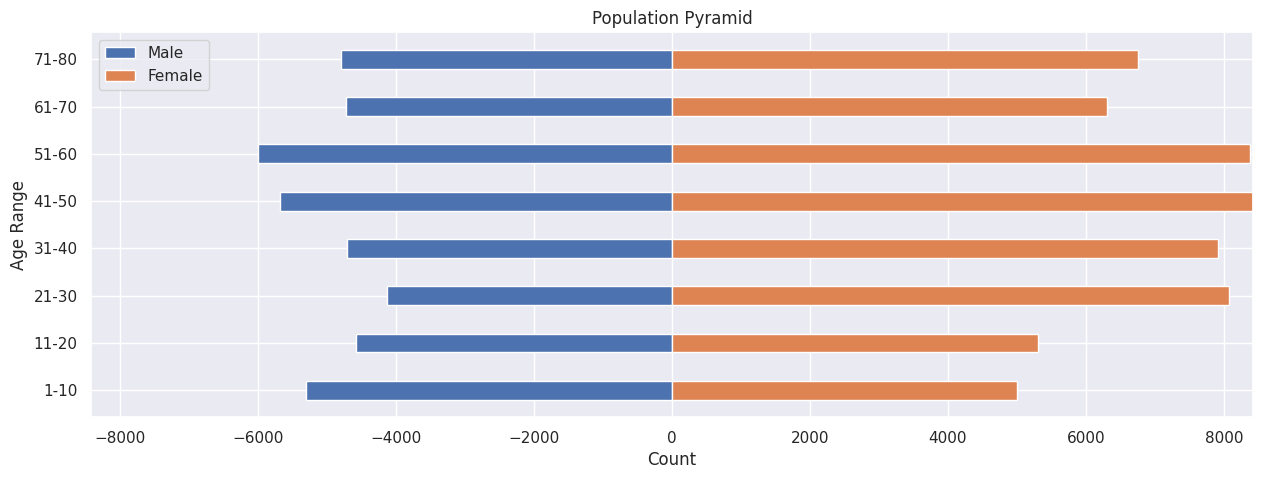

In [ ]:
import matplotlib.pyplot as plt

counts = dataset.groupby(['age_range', 'gender']).size().unstack()
counts['Female'] = counts['Female'][::-1]

fig, ax = plt.subplots()

ax.barh(counts.index, -counts['Male'], height=0.4, label='Male')
ax.barh(counts.index, counts['Female'], height=0.4, label='Female')

ax.set_xlim(-max(counts.max()), max(counts.max()))
ax.set_xlabel('Count')
ax.set_ylabel('Age Range')
ax.set_title('Population Pyramid')
ax.legend()

plt.show()


In [ ]:
glucosevel = dataset['blood_glucose_level']
glucosevel = pd.DataFrame(glucosevel)

blood_glucose_level
0                      140
1                       80
2                      158
3                      155
4                      155
...                    ...
99994                  145
99996                  100
99997                  155
99998                  100
99999                   90

[96146 rows x 1 columns]

In [ ]:
for index,row in glucosevel.iterrows():
  if glucosevel.at[index,'blood_glucose_level']<100:
    glucosevel.at[index,'glucosevel_range'] = 'Below 100'
  elif glucosevel.at[index,'blood_glucose_level']>=100 and glucosevel.at[index,'blood_glucose_level']=<120:
    glucosevel.at[index,'glucosevel_range']='100-120'
  elif glucosevel.at[index,'blood_glucose_level']=>121 and glucosevel.at[index,'blood_glucose_level']=<140 :
    glucosevel.at[index,'glucosevel_range']='121-140'
  elif glucosevel.at[index,'blood_glucose_level']>=141 and glucosevel.at[index,'blood_glucose_level']=<160 :
    glucosevel.at[index,'glucosevel_range']='141-160'
  elif glucosevel.at[index,'blood_glucose_level']>=161 and glucosevel.at[index,'blood_glucose_level']=<180 :
    glucosevel.at[index,'glucosevel_range']='161-180'
  elif glucosevel.at[index,'blood_glucose_level']>=181 and glucosevel.at[index,'blood_glucose_level']=<200 :
    glucosevel.at[index,'glucosevel_range']='181-200'
  else:
    glucosevel.at[index,'glucosevel_range']='Above 200'

SyntaxError: ignored

In [ ]:
for index,row in age.iterrows():
  if age.at[index,'age']<18:
    age.at[index,'age_group']='Below 18'
  elif age.at[index,'age']>=18 and age.at[index,'age']<=24:
    age.at[index,'age_group']='18-24'
  elif age.at[index,'age']>=25 and age.at[index,'age']<=35:
    age.at[index,'age_group']='25-35'
  elif age.at[index,'age']>=36 and age.at[index,'age']<=45:
    age.at[index,'age_group']='36-45'
  elif age.at[index,'age']>=46 and age.at[index,'age']<=59:
    age.at[index,'age_group']='46-59'
  else:
    age.at[index,'age_group']='Above 60'